## House Price Prediction - USA 

### About Dataset.
This dataset contains Real Estate listings in the US broken by State and zip code.

### Content. 

realtor-data.csv (2,226,382 entries):

    brokered by (categorically encoded agency/broker)
    status (Housing status - a. ready for sale or b. ready to build)
    price (Housing price, it is either the current listing price or recently sold price if the house is sold recently)
    bed (# of beds)
    bath (# of bathrooms)
    acre_lot (Property / Land size in acres)
    street (categorically encoded street address)
    city (city name)
    state (state name)
    zip_code (postal code of the area)
    house_size (house area/size/living space in square feet)
    prev_sold_date (Previously sold date)

NB:

_brokered by and street addresses_ were categorically encoded due to data privacy policy.

_acre_lot_ means the total land area, and _house_size_ denotes the living space/building area

### Acknowledgment. 


Data was collected from - 
https://www.realtor.com/ - A real estate listing website operated by the News Corp subsidiary Move, Inc. and based in Santa Clara, California. It is the second most visited real estate listing website in the United States as of 2024, with over 100 million monthly active users.

## Step 1. IDA.

In [1]:
# IMPORT NECCESSARY LIBRARIES
import pandas as pd
from sklearn.model_selection import train_test_split 
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy import stats
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# import matplotlib.ticker as mtick

In [3]:
data = pd.read_csv(r'c:\Users\Администратор\Documents\study\CSME 830\house_price_project\data\raw\raw_data.csv')
data.head()

,brokered_by,status,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,price
0,91206.0,sold,NaN,NaN,10.01,1879287.0,Temple,Texas,76501.0,NaN,2022-04-22,200000.0
1,16829.0,for_sale,4.0,3.0,0.21,1446993.0,San Francisco,California,94112.0,1530.0,NaN,1195000.0
2,20082.0,sold,2.0,2.0,30.81,1653941.0,Saint Petersburg,Florida,33716.0,975.0,2022-02-25,185000.0
3,73706.0,sold,2.0,1.0,1.58,136346.0,Friendship,Wisconsin,53934.0,700.0,2022-04-28,69000.0
4,45276.0,for_sale,4.0,4.0,0.12,1549817.0,West Jordan,Utah,84081.0,1888.0,2020-10-09,515000.0


In [4]:
data.shape

(1781105, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781105 entries, 0 to 1781104
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   bed             float64
 3   bath            float64
 4   acre_lot        float64
 5   street          float64
 6   city            object 
 7   state           object 
 8   zip_code        float64
 9   house_size      float64
 10  prev_sold_date  object 
 11  price           float64
dtypes: float64(8), object(4)
memory usage: 163.1+ MB


In [6]:
data.describe()

,brokered_by,bed,bath,acre_lot,street,zip_code,house_size,price
count,1.777457e+06,1.396118e+06,1.371738e+06,1.520724e+06,1.772396e+06,1.780862e+06,1.326633e+06,1.779868e+06
mean,5.293091e+04,3.275631e+00,2.496633e+00,1.494546e+01,1.012208e+06,5.219230e+04,2.877319e+03,5.249854e+05
std,3.064363e+04,1.598861e+00,1.722645e+00,7.479973e+02,5.837096e+05,2.895639e+04,9.034437e+05,2.299435e+06
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.010000e+02,4.000000e+00,0.000000e+00
25%,2.385900e+04,3.000000e+00,2.000000e+00,1.500000e-01,5.061788e+05,2.961700e+04,1.300000e+03,1.650000e+05
50%,5.288400e+04,3.000000e+00,2.000000e+00,2.600000e-01,1.012610e+06,4.842000e+04,1.760000e+03,3.250000e+05
75%,7.918000e+04,4.000000e+00,3.000000e+00,9.800000e-01,1.521023e+06,7.807000e+04,2.413000e+03,5.500000e+05
max,1.101420e+05,4.730000e+02,8.300000e+02,1.000000e+05,2.001356e+06,9.999900e+04,1.040400e+09,2.147484e+09


### Initial Data Selection

_brokered by_ and _street_ were encoded due to data privacy, therefore there is no reason to keep them and work with them.

In [ ]:
# # 1. Check initial shape
# print(data.shape, data['price'].isna().sum())

# # 2. Drop rows ONLY where 'price' is NaN, but keep the DataFrame structure
# data = data.dropna(subset=['price'])

# # 3. Check shape again (Success)
# print(data.shape, data['price'].isna().sum())

(1781105, 12) 1237
(1779868, 12) 0


In [7]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# 1. Drop columns
data = data.drop(columns=['brokered_by', 'street'], errors='ignore')

# 2. Drop the NaN in price (CRITICAL STEP)
# You must do this before creating bins or splitting
data = data.dropna(subset=['price'])

# 3. Create temporary "Price Bins"
# We divide prices into 10 categories so stratify has groups to work with.
data['price_bins'] = pd.cut(data['price'], bins=10, labels=False)

# Handle rare bins: If a bin has only 1 item, stratify will crash.
# We filter to keep only bins with at least 2 items.
freqs = data['price_bins'].value_counts()
data = data[data['price_bins'].isin(freqs[freqs >= 2].index)]

# 4. STRATIFIED SAMPLING
# Notice we stratify on 'price_bins', NOT 'price'
_, sample_data = train_test_split(
    data, 
    test_size=0.1, 
    stratify=data['price_bins'], 
    random_state=42
)

# 5. Clean up: Remove the temporary bin column
sample_data = sample_data.drop(columns=['price_bins'])


print(f'The shape of the data frame is{sample_data.shape}')

The shape of the data frame is(177987, 10)


Dropping the columns helped to reduce memory usage (from 163+ MB to 14+ MB).

In [8]:
# now we have 10 columns
df = sample_data
df.to_csv(r'c:\Users\Администратор\Documents\study\CSME 830\house_price_project\data\raw\sample_before_cleaning.csv')
df.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

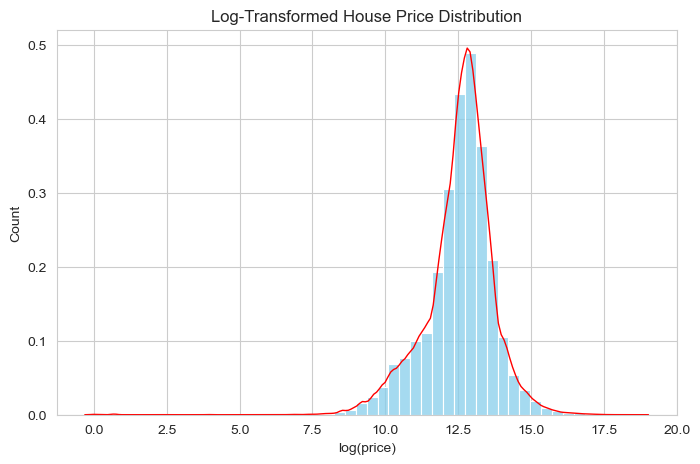

In [53]:
plt.figure(figsize=(8,5))
# plt.hist(np.log1p(df['price']), bins=50)
sns.histplot(np.log1p(sample_data['price']), bins=50, stat='density', color="skyblue")

sns.kdeplot(np.log1p(sample_data['price']), color="red", linewidth=1)

plt.title("Log-Transformed House Price Distribution")
plt.xlabel("log(price)")
plt.ylabel("Count")
plt.show()

## Step 2. Data Preprocessing

### Step 2.0 [Initial Step]

In [10]:
# function to report the missing percentage and values
def missing_report(df):
    missing_values = df.isnull().sum() # count of missing values
    missing_percentage = (missing_values / len(df)) * 100 # percentage of missing values
    # display the results in a df
    missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage.round(2)})
    return missing_data.sort_values(by = "Percentage", ascending=False)
missing_report(df)

,Missing Values,Percentage
prev_sold_date,58614,32.93
house_size,45567,25.60
bath,41019,23.05
bed,38639,21.71
acre_lot,25952,14.58
city,107,0.06
zip_code,22,0.01
status,0,0.00
state,0,0.00
price,0,0.00


I decided to drop the minimal missing values, such as zip-code, state, city, and price. Specially the price, it's not reasonable to predict the price without knowing the price. 

In [11]:
### HANDLING MISSING VALUES ###

# drop the duplicates
cnt = df.duplicated().sum()
df = df.drop_duplicates()

# Dropping rows with missing values in 'zip_code', 'state', 'city', and 'price'
df = df.dropna(subset=['zip_code', 'state', 'city', 'price']) 

print(f"After dropping {cnt} data, missingness decreased to: \n\n", missing_report(df))
# missing_report(df)

After dropping 702 data, missingness decreased to: 

                 Missing Values  Percentage
prev_sold_date           57881       32.67
house_size               44950       25.37
bath                     40407       22.81
bed                      38026       21.46
acre_lot                 25807       14.57
status                       0        0.00
city                         0        0.00
state                        0        0.00
zip_code                     0        0.00
price                        0        0.00


### Step 2.1 [prev_sold_date - Missingness is informative!]

_prev sold date_ has 31.69% of missing values. We cannot just drop it, we might lose useful infomation. 

There might be three possible reasons:
1. houses never sold before (if there's overlap between status(ready to built = new homes = never sold before)?)
2. first time listings
3. data not available. 


In [12]:
# 1. houses never sold before (if there's overlap between status(ready to built))
df['status'].value_counts()

status
for_sale          110311
sold               64879
ready_to_build      1975
Name: count, dtype: int64

In [13]:
# Create a new binary feature 'has_prev_sale', if date exits then 1 else 0
df['has_prev_sale'] = np.where(df['prev_sold_date'].isnull(), 0, 1)

In [14]:
# Questions to explore:
# Are these missing values related to status? (e.g., "ready to build" = new homes = no previous sale?)
df['status'].value_counts()
df.groupby('status')['has_prev_sale'].value_counts(normalize=True)

status          has_prev_sale
for_sale        0                0.506803
                1                0.493197
ready_to_build  0                1.000000
sold            1                1.000000
Name: proportion, dtype: float64

50.4% and all 100% of missing values are from properties for sale and ready_to_build respectively. It makes sense. We can conclude that the missingness is depends on feature itself, since it never been sold before. Therefore, it's MNAR. The missing values carrie information, it's a new property, not a resale, etc. 

Rather than imputing a fake data in the _prev sold date_ I have created a new feature to check if the property is a new construction or have been sold before. And if the property was sold before, we will have a history of sale. 

### Step 2.2 [bed, bath, house_size - why these missingness are related?]

Each of these attributes have more than 20% of missingness. 

Questions to explore:

Are missing house_size correlated with "ready to build" status?

Can you impute based on bed, bath, state, city?

What's the overlap with missing bed/bath?

In [15]:
len(df[df['status']=='ready_to_build'])

1975

Text(0.5, 0, 'Status')

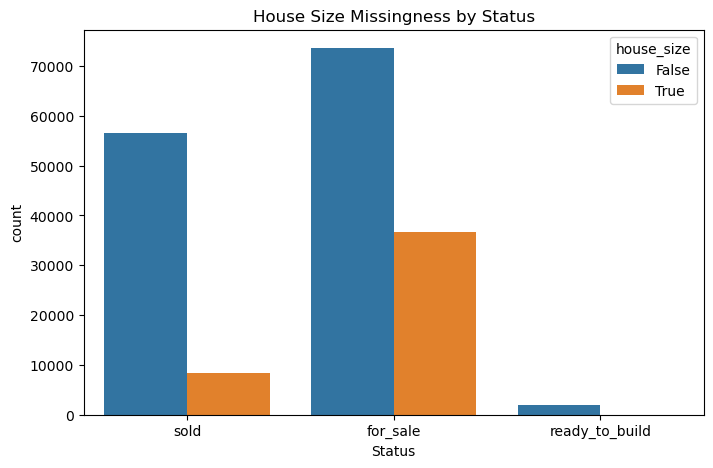

In [16]:
# visualization of overlap between house_size missingness and ready_to_build status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='status', hue=df['house_size'].isnull())
plt.title('House Size Missingness by Status')
plt.xlabel('Status')

In [17]:
# Overlap pie chart

bed_missing = df['bed'].isnull()
bath_missing = df['bath'].isnull()
house_size_missing = df['house_size'].isnull()

combinatinos = {
    'None missing': (~bed_missing & ~bath_missing & ~house_size_missing).sum(),
    'Only bed missing': (bed_missing & ~bath_missing & ~house_size_missing).sum(),
    'Only bath missing': (~bed_missing & bath_missing & ~house_size_missing).sum(),
    'Only house_size missing': (~bed_missing & ~bath_missing & house_size_missing).sum(),
    'Bed and bath missing': (bed_missing & bath_missing & ~house_size_missing).sum(),
    'Bed and house_size missing': (bed_missing & ~bath_missing & house_size_missing).sum(),
    'Bath and house_size missing': (~bed_missing & bath_missing & house_size_missing).sum(),
    'All missing': (bed_missing & bath_missing & house_size_missing).sum()
}   

colors_detailed = ['#2ecc71', '#f39c12', '#e67e22', '#3498db', 
                   '#e74c3c', '#c0392b', '#e74c3c', '#8e44ad']

fig1 = go.Figure(data=[go.Pie( # pie chart
    labels=list(combinatinos.keys()), # labels
    values=list(combinatinos.values()), # values
    marker=dict(colors=colors_detailed), # colors
    textinfo='label+percent', # show label and percent
    textposition='auto', # auto position text
    hole= 0.4, # donut chart
    pull = [0, 0, 0, 0, 0.05, 0.05, 0.05, 0.15] # pull out slices with missing values
)])
fig1.update_layout( # layout
    title={
        'text': '<b>Missing Value Pattern Distribution</b><br>' +
                '<sub>Interactive breakdown of bed, bath, house_size combinations</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'family': 'Arial Black'}
    },
    showlegend=True, # show legend
    legend=dict( # position legend outside the pie chart
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.05,
        font=dict(size=12)
    ),
    annotations=[dict( # center text
        text=f'Total: {len(df):,}<br>rows',
        x=0.5, y=0.5,
        font=dict(size=16, family='Arial Black'),
        showarrow=False
    )],
    width=900,
    height=600,
    template='plotly_white' # clean white background
)
fig1.show()
                    

In [ ]:
# Correlation matrix of missing values
critical_cols = ['bed', 'bath', 'house_size', 'acre_lot', 'prev_sold_date'] # columns with significant missing values
missing_indicators = df[critical_cols].isnull().astype(int) # create binary indicators
corr_matrix = missing_indicators.corr() # correlation matrix
def heatmap(corr_matrix):
    fig5 = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.index,
        colorscale='RdYlGn_r',
        zmid=0.5,
        text=corr_matrix.values,
        texttemplate='%{text:.2f}',
        textfont={"size": 14, "family": "Arial Black"},
        colorbar=dict(title="Correlation"),
        hovertemplate='<b>%{y} vs %{x}</b><br>' +
                    'Correlation: %{z:.3f}<br>' +
                    '<extra></extra>'
    ))

    fig5.update_layout(
        title={
            'text': '<b>Missing Value Correlation Matrix</b><br>' +
                    '<sub>Higher values = features tend to be missing together</sub>',
            'x': 0.5,
            'xanchor': 'center',
            'font': {'size': 20, 'family': 'Arial Black'}
        },
        xaxis_title='Features',
        yaxis_title='Features',
        width=800,
        height=700,
        template='plotly_white'
    )

    fig5.show()

heatmap(corr_matrix)

AFTER DROPPING CORRELATION MAP TO DO

In [19]:
# missingness might be related to status, these properties are land, since they are not constructions we can drop them
for_sale = df['status'].isin(['for_sale', 'sold'])
# select rows where house_size and bed and bath are missing and status is 'for_sale' or 'sold'
land = df[for_sale & df['house_size'].isnull() & df['bed'].isnull() & df['bath'].isnull()]
for_sale_missing = df[for_sale & df['house_size'].isnull()]

#bed_missing & bath_missing & house_size_missing drop these rows
# df_imputed = df.drop(for_sale_missing.index)
# df_imputed.shape
for_sale_missing.head()
missing_report(for_sale_missing)

,Missing Values,Percentage
house_size,44949,100.00
bath,36848,81.98
bed,36376,80.93
prev_sold_date,27100,60.29
acre_lot,3938,8.76
status,0,0.00
city,0,0.00
state,0,0.00
zip_code,0,0.00
price,0,0.00


In [20]:
# drop rows where house_size, bed, and bath are missing and status is 'for_sale' or 'sold'
# these properties are likely land-only listings, and i am predicting house not land
missing_report(df)

,Missing Values,Percentage
prev_sold_date,57881,32.67
house_size,44950,25.37
bath,40407,22.81
bed,38026,21.46
acre_lot,25807,14.57
status,0,0.00
city,0,0.00
state,0,0.00
zip_code,0,0.00
price,0,0.00


In [21]:
"""
Overlap findings: "More than 90% of rows with missing house_size also have missing bed and bath"
Status correlation: "around 24% of missing values are from for sale or sold properties"
Decision made: "Based on the overlap, we decided to drop these rows, 
house_size is critical for our analysis and these properties are likely land-only listings"
"""
df = df.drop(land.index)
missing_report(df)

,Missing Values,Percentage
prev_sold_date,32921,23.36
acre_lot,24801,17.60
house_size,8736,6.20
bath,4193,2.97
bed,1812,1.29
status,0,0.00
city,0,0.00
state,0,0.00
zip_code,0,0.00
price,0,0.00


In [ ]:
# Correlation matrix of missing values
# critical_cols = ['bed', 'bath', 'house_size', 'acre_lot', 'prev_sold_date'] # columns with significant missing values
# missing_indicators = df[critical_cols].isnull().astype(int) # create binary indicators
corr_matrix_after = missing_indicators.corr() # correlation matrix
heatmap(corr_matrix_after)

In [23]:
# distribution of status in missingness of bed and bath
df.groupby('status')[['bed', 'bath']].apply( lambda x: x.isna().sum())

,bed,bath
status,,
for_sale,1073,866
ready_to_build,1,1975
sold,738,1352


### Step2.3 [acre lot - Why is it missing?]

In [24]:
df.groupby('status')['acre_lot'].apply( lambda x: x.isna().sum())

status
for_sale          14432
ready_to_build     1975
sold               8394
Name: acre_lot, dtype: int64

Questions to explore:

1. Check: Does missingness correlate with city (urban vs rural)?
2. Impute with 0 for apartments/condos (or create "unknown" category)
3. OR use median by city/state
4. Consider: Create binary feature has_lot_info

In [25]:
# is it rural or urban? How we can check it? Why? If it's in urban place, it's likely to be an apartment or condo, so we can impute with 0.

# Compare properties WITH vs WITHOUT acre_lot
print('House size of Houses with lots', df[df['acre_lot'].notna()]['house_size'].mean())  # Houses with lots
print('House size of Houses without lots', df[df['acre_lot'].isna()]['house_size'].mean())   # Houses without lots
# Are they different? If yes → systematic!
# It means that the house' properties are different, it's likely is a different type of property as we mentioned above.

#Price
print('Price of Houses with lots', df[df['acre_lot'].notna()]['price'].mean())  # Houses with lots
print('Prices of Houses without lots', df[df['acre_lot'].isna()]['price'].mean())   # Houses without lots

House size of Houses with lots 2142.9117329877567
House size of Houses without lots 1649.6289098225718
Price of Houses with lots 581698.3172621609
Prices of Houses without lots 605679.684379662


In [26]:
# Look at distribution
missing_lot = df[df['acre_lot'].isna()]

print("House size statistics for missing acre_lot:")
print(missing_lot['house_size'].describe())

print("\nPercentiles:")
for p in [25, 50, 75, 90, 95, 99]:
    val = missing_lot['house_size'].quantile(p/100)
    print(f"  {p}th: {val:.0f} sqft")

# Check for extreme outliers
extreme = missing_lot[missing_lot['house_size'] > 10000]
print(f"\nProperties >10,000 sqft: {len(extreme):,} ({len(extreme)/len(missing_lot)*100:.1f}%)")

House size statistics for missing acre_lot:
count    21868.000000
mean      1649.628910
std        948.812255
min        100.000000
25%       1047.000000
50%       1451.000000
75%       2034.000000
max      24173.000000
Name: house_size, dtype: float64

Percentiles:
  25th: 1047 sqft
  50th: 1451 sqft
  75th: 2034 sqft
  90th: 2720 sqft
  95th: 3185 sqft
  99th: 4555 sqft

Properties >10,000 sqft: 21 (0.1%)


In [27]:
# Remove physically impossible values
# Largest homes in USA are ~100,000 sqft
# Anything beyond that is likely an error
extreme_outliers = df[df['house_size'] > 50000]
df_clean = df[df['house_size'] <= 100000].copy()
print(f"Removed {len(df) - len(df_clean):,} extreme outliers")
# df.drop(extreme_outliers)
missing_report(df_clean)

Removed 8,743 extreme outliers


,Missing Values,Percentage
prev_sold_date,30777,23.28
acre_lot,21868,16.54
bath,3556,2.69
bed,1648,1.25
status,0,0.00
city,0,0.00
state,0,0.00
zip_code,0,0.00
house_size,0,0.00
price,0,0.00


In [28]:
# After removing outliers
df_clean = df[df['house_size'] <= 50000]  # Reasonable upper bound

with_lot = df_clean[df_clean['acre_lot'].notna()]
without_lot = df_clean[df_clean['acre_lot'].isna()]

print("AFTER removing outliers:")
print(f"\nWITH acre_lot:")
print(f"  Mean: {with_lot['house_size'].mean():.0f} sqft")
print(f"  Median: {with_lot['house_size'].median():.0f} sqft")

print(f"\nWITHOUT acre_lot:")
print(f"  Mean: {without_lot['house_size'].mean():.0f} sqft")
print(f"  Median: {without_lot['house_size'].median():.0f} sqft")

AFTER removing outliers:

WITH acre_lot:
  Mean: 2111 sqft
  Median: 1817 sqft

WITHOUT acre_lot:
  Mean: 1650 sqft
  Median: 1451 sqft


c:\anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log10



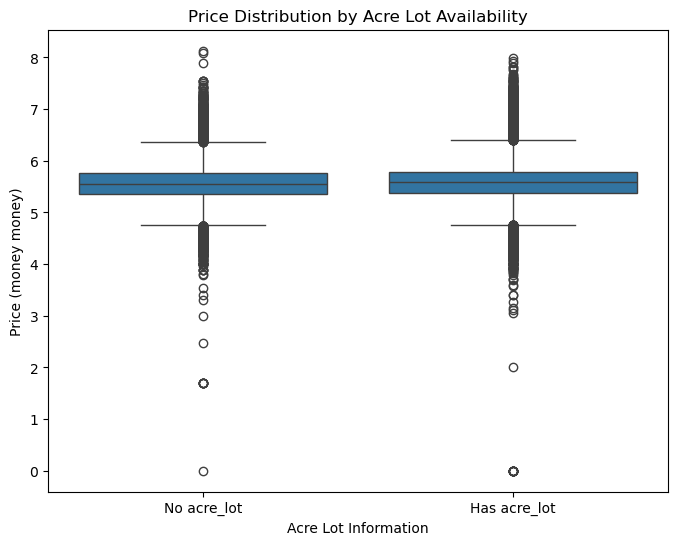

In [29]:

plt.figure(figsize=(8, 6))
sns.boxplot(
    x=df['acre_lot'].isnull().map({True: 'No acre_lot', False: 'Has acre_lot'}),
    y=np.log10(df['price'])
)
plt.xlabel('Acre Lot Information')
plt.ylabel('Price (money money)')
plt.title('Price Distribution by Acre Lot Availability')
plt.show()

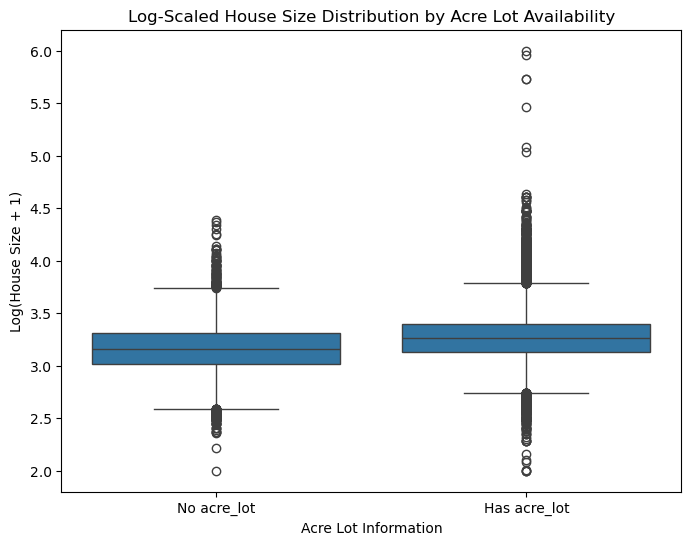

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x=df['acre_lot'].isnull().map({True: 'No acre_lot', False: 'Has acre_lot'}),
    y=np.log10(df['house_size'])
)
plt.xlabel('Acre Lot Information')
plt.ylabel('Log(House Size + 1)')
plt.title('Log-Scaled House Size Distribution by Acre Lot Availability')
plt.show()

Now we can confirm out theory about condos/apartments. These houses are likely to be an apartment or condos. 
Their sizes are different but price distribution are roughly the same, I assume they are located in urban area. 

In [31]:
#beofre imputing with zero, one more thing to check
# Of properties that HAVE acre_lot data, how many are 0?
has_lot = df[df['acre_lot'].notna()]
zero_count = (has_lot['acre_lot'] == 0).sum()
zero_pct = (zero_count / len(has_lot)) * 100

print(f"Existing acre_lot values that are 0: {zero_count:,} ({zero_pct:.2f}%)")
print(f"Min acre_lot (non-zero): {has_lot[has_lot['acre_lot'] > 0]['acre_lot'].min():.4f} acres")

Existing acre_lot values that are 0: 141 (0.12%)
Min acre_lot (non-zero): 0.0100 acres


In [32]:
df['state'].unique()

array(['Florida', 'Texas', 'New York', 'South Carolina', 'Delaware',
       'Pennsylvania', 'Georgia', 'Michigan', 'Oregon', 'Alabama', 'Utah',
       'Virginia', 'Maryland', 'California', 'Washington', 'Iowa',
       'New Mexico', 'Arizona', 'Tennessee', 'New Jersey', 'Nevada',
       'North Carolina', 'Indiana', 'Oklahoma', 'Wisconsin',
       'Massachusetts', 'Louisiana', 'Illinois', 'Nebraska',
       'Rhode Island', 'Missouri', 'Ohio', 'Kentucky', 'Arkansas',
       'Mississippi', 'Minnesota', 'District of Columbia', 'Connecticut',
       'Kansas', 'Colorado', 'Idaho', 'Wyoming', 'Hawaii', 'Alaska',
       'Maine', 'Montana', 'South Dakota', 'New Hampshire', 'Vermont',
       'West Virginia', 'Puerto Rico', 'North Dakota', 'Virgin Islands',
       'Guam'], dtype=object)

In [33]:
# Fill with median of small properties in same city

# For properties without acre_lot (likely condos)
# missing_mask = df['acre_lot'].isna()

# # Impute with median of small properties (<2000 sqft) in same city
# for city in df[missing_mask]['city'].unique():
#     city_mask = (df['city'] == city) & (df['house_size'] < 2000) & (df['acre_lot'].notna())
    
#     if city_mask.sum() > 5:  # If enough samples
#         city_small_median = df[city_mask]['acre_lot'].median()
#         df.loc[(df['city'] == city) & missing_mask, 'acre_lot'] = city_small_median

"""
it ran more than 10 minutes, i had to stop, i had about 17k unique cities... 
"""

# Fallback: state median for remaining
df['acre_lot'] = df.groupby('state')['acre_lot'].transform(lambda x: x.fillna(x.median()))

# Final fallback: 0
df['acre_lot'].fillna(0, inplace=True)

C:\Users\Администратор\AppData\Local\Temp\ipykernel_17148\190492300.py:22: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [34]:
missing_report(df)

,Missing Values,Percentage
prev_sold_date,32921,23.36
house_size,8736,6.20
bath,4193,2.97
bed,1812,1.29
status,0,0.00
acre_lot,0,0.00
city,0,0.00
state,0,0.00
zip_code,0,0.00
price,0,0.00


In [35]:
missing_house_bed = df[df['house_size'].isna() & df['bed'].isna()]
print(f"house_size + bed missing: {len(missing_house_bed):,}")

missing_house_bath = df[df['house_size'].isna() & df['bath'].isna()]
print(f"house_size + bath missing: {len(missing_house_bath):,}")

house_size + bed missing: 162
house_size + bath missing: 635


Overlapping is really small here, therefore we can assume it's random errors. 

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Encode categoricals
le_state = LabelEncoder()
le_city = LabelEncoder()
df['state_encoded'] = le_state.fit_transform(df['state'].astype(str))
df['city_encoded'] = le_city.fit_transform(df['city'].astype(str))

def fast_regression_impute(df, target, predictors):
    """Fast regression imputation"""
    train = df[df[target].notna()]
    predict = df[df[target].isna()]
    
    if len(predict) == 0:
        return df[target]
    
    X_train = train[predictors].fillna(0)
    y_train = train[target]
    X_pred = predict[predictors].fillna(0)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_pred)
    
    result = df[target].copy()
    result.loc[predict.index] = predictions
    return result

# Impute in order 
print("1. Imputing bed...")
df['bed'] = fast_regression_impute(df, 'bed', 
    ['bath', 'house_size', 'price', 'state_encoded', 'city_encoded'])

print("2. Imputing bath...")
df['bath'] = fast_regression_impute(df, 'bath',
    ['bed', 'house_size', 'price', 'state_encoded', 'city_encoded'])

print("3. Imputing house_size...")
df['house_size'] = fast_regression_impute(df, 'house_size',
    ['bed', 'bath', 'acre_lot', 'price', 'state_encoded', 'city_encoded'])

# Post-process: Round and clip to reasonable ranges
df['bed'] = df['bed'].round().clip(0, 20).astype(int)
df['bath'] = df['bath'].round().clip(0, 20).astype(int)
df['house_size'] = df['house_size'].clip(100, 50000)

# Clean up
df = df.drop(['state_encoded', 'city_encoded'], axis=1)

print("\nImputation complete!")

1. Imputing bed...
2. Imputing bath...
3. Imputing house_size...

Imputation complete!


In [37]:
missing_report(df)

,Missing Values,Percentage
prev_sold_date,32921,23.36
status,0,0.00
bed,0,0.00
bath,0,0.00
acre_lot,0,0.00
city,0,0.00
state,0,0.00
zip_code,0,0.00
house_size,0,0.00
price,0,0.00


**Summary about missingness**

```prev_sold_date - MNAR
acre_lot - MNAR
house_size - MAR
bath - MAR
bed - MAR
zip_code - MCAR
price - MCAR
city - MCAR

## Step 3. Analysis


### Step 3.0 [Price Distribution]

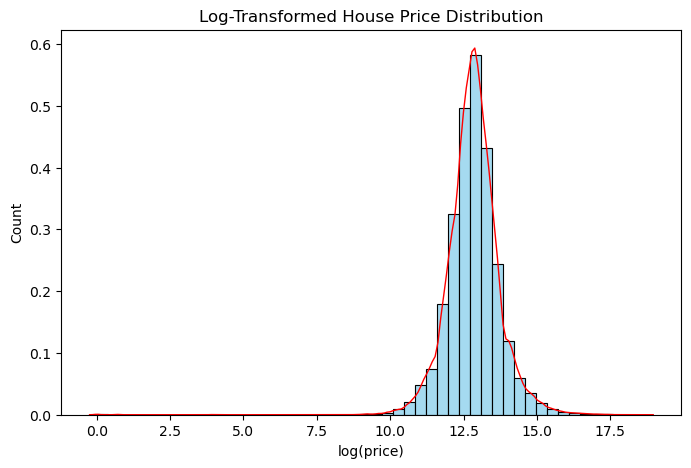

In [38]:
plt.figure(figsize=(8,5))
# plt.hist(np.log1p(df['price']), bins=50)
sns.histplot(np.log1p(df['price']), bins=50, stat='density', color="skyblue")

sns.kdeplot(np.log1p(df['price']), color="red", linewidth=1)

plt.title("Log-Transformed House Price Distribution")
plt.xlabel("log(price)")
plt.ylabel("Count")
plt.show()

### Step 3.1 [Where is the expensive houses in the US?]

In [39]:
# most expensive states
state_avg = df.groupby('state')['price'].mean().sort_values(ascending=False).head(15)
fig = px.bar(state_avg, 
             x=state_avg.index, 
             y=state_avg.values, 
             orientation='v',
             title="Top 15 Most Expensive States by Average House Price")
fig.update_layout(xaxis_title="Average Price", yaxis_title="State")
fig.show()


C:\Users\Администратор\AppData\Local\Temp\ipykernel_17148\1849514378.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




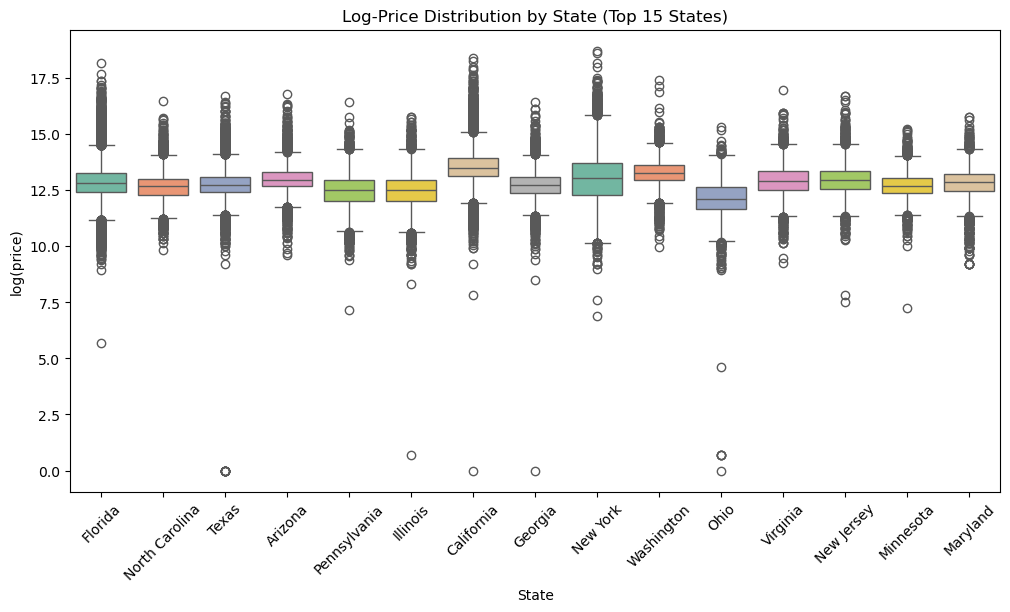

In [40]:

top_states = df['state'].value_counts().head(15).index
df_top = df[df['state'].isin(top_states)]

plt.figure(figsize=(12,6))
sns.boxplot(
    x="state",
    y=np.log1p(df["price"]),
    data=df_top,
    palette="Set2"
)

plt.xticks(rotation=45)
plt.title("Log-Price Distribution by State (Top 15 States)")
plt.xlabel("State")
plt.ylabel("log(price)")
plt.show()

### Step 3.2. Correlation Heat map

In [41]:
num_cols = ['price', 'bed', 'bath', 'acre_lot', 'house_size', 'has_prev_sale']
corr = df[num_cols].corr()


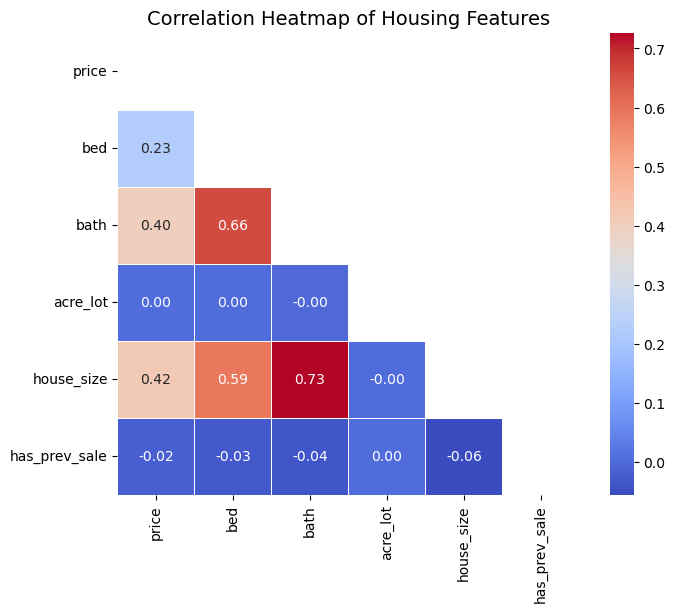

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    mask=np.triu(np.ones_like(corr, dtype=bool))
)
plt.title("Correlation Heatmap of Housing Features", fontsize=14)
plt.show()


In [43]:
def price_per_sqft(state_df):
    """
    state_df - dataframe of states
    return: price per sqft on the states
    """

    # Select the features (X) and target (y)
    X = state_df[['house_size']]
    y = state_df['price']
    
    # Check for sufficient data
    if len(state_df) < 100:
        return np.nan

    # Fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Return the coefficient (slope)
    return model.coef_[0]

In [44]:

target_states = df[df['state'].isin(top_states)]

In [45]:
# Group the filtered data by state
grouped_states = target_states.groupby('state')

# Apply the function to the selected state groups
price_per_sqft_results = grouped_states.apply(price_per_sqft).to_frame(name='price_per_sqft_model')

C:\Users\Администратор\AppData\Local\Temp\ipykernel_17148\2356904042.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [46]:
# Calculate simple averages for context
state_averages = grouped_states[['price', 'house_size']].mean()
state_averages.columns = ['avg_price', 'avg_house_size']

# Join the results
final_summary = state_averages.join(price_per_sqft_results)

# Sort by Price/Sqft for easy comparison
final_summary = final_summary.sort_values(by='price_per_sqft_model', ascending=False)

# Print the final result for the selected states
final_summary['price_per_sqft_model']

state
New York          916.261608
California        882.394067
Florida           795.923039
Arizona           495.310728
Washington        436.062188
North Carolina    300.613134
Virginia          271.847247
Texas             263.456275
Georgia           233.488235
Maryland          230.570970
Pennsylvania      220.888665
Minnesota         182.160035
Illinois          160.610162
New Jersey        145.677752
Ohio               91.805366
Name: price_per_sqft_model, dtype: float64

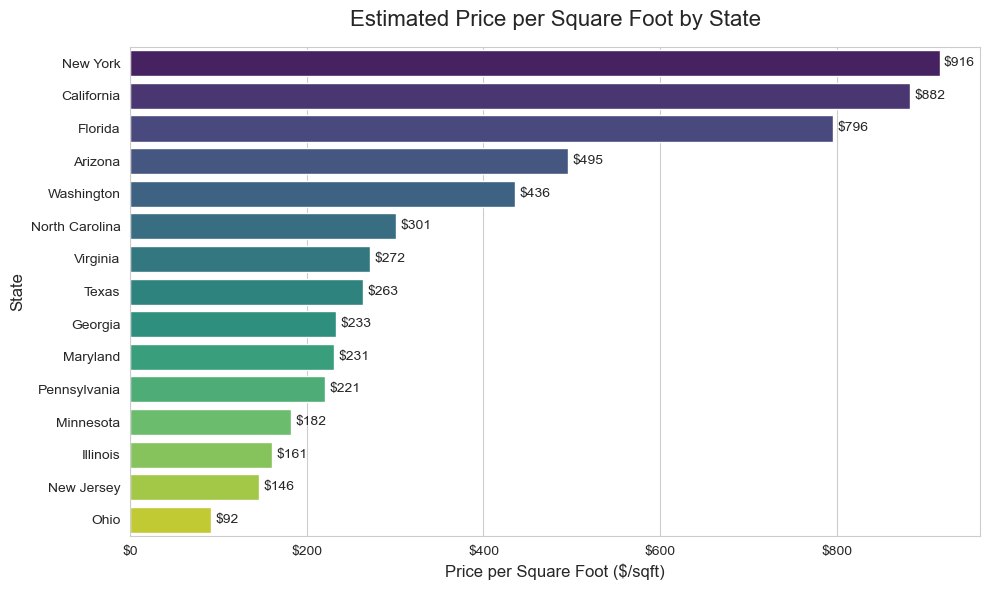

In [47]:
# 1. Setup the plot style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# 2. Create the horizontal bar chart
# The 'price_per_sqft_model' column holds the calculated beta_1 (Price/Sqft)
sns.barplot(
    x=final_summary['price_per_sqft_model'],
    y=final_summary.index, # States are in the index after groupby
    hue=final_summary.index,       # State names determine color
    legend=False,                  # Hide the redundant legend
    palette="viridis",
    ax=ax
)

# 3. Add labels and title
ax.set_title('Estimated Price per Square Foot by State', fontsize=16, pad=15)
ax.set_xlabel('Price per Square Foot ($/sqft)', fontsize=12)
ax.set_ylabel('State', fontsize=12)

# 4. Format the X-axis as currency
# Using a currency formatter makes the dollar values easy to read
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# 5. Add exact dollar values on the bars for precision
for i, (value, name) in enumerate(zip(final_summary['price_per_sqft_model'], final_summary.index)):
    ax.text(value + 5, i, f'${value:,.0f}', va='center', ha='left', fontsize=10)

# Adjust plot layout and save the figure
plt.tight_layout()
# plt.savefig('price_per_sqft_by_state.png')
# plt.close()

In [48]:
avg_nyc = df[df['city']=='New York City']['price'].mean()
df_nyn = df[df['state']=='New York']['city'].nunique()
print(f"New York has {df_nyn} cities, and the average price for NYC is {avg_nyc}, which is way more higher than in other states.")


New York has 1028 cities, and the average price for NYC is 2544359.0152526214, which is way more higher than in other states.


Although it looks like the houses in New York are cheaper, it's for all the cities in the state NewYork. New York has 1719 cities. It causes a Pearson Paradox. Actually the house price in the New York City is higher, but because of other 1700+ cities, the average price decreased.

In [49]:
df.head()
# df.shape

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,has_prev_sale
654932,sold,1,2,0.21,Coral Gables,Florida,33134.0,847.000000,2022-02-15,330000.0,1
1498664,sold,4,3,3.00,Colleyville,Texas,76034.0,2758.000000,2022-03-09,1275000.0,1
539858,for_sale,2,1,0.21,New York,New York,10003.0,965.063941,2014-05-15,800000.0,1
859773,for_sale,3,3,0.10,Elgin,South Carolina,29045.0,1726.000000,NaN,306830.0,0
278995,sold,4,3,0.42,Wilmington,Delaware,19807.0,4327.000000,2022-01-05,600000.0,1


In [50]:
# df_numeric = df.select_dtypes(include='number')
df_numeric = df[['acre_lot', 'bed', 'bath', 'house_size', 'price']]
df_numeric

,acre_lot,bed,bath,house_size,price
654932,0.21,1,2,847.000000,330000.0
1498664,3.00,4,3,2758.000000,1275000.0
539858,0.21,2,1,965.063941,800000.0
859773,0.10,3,3,1726.000000,306830.0
278995,0.42,4,3,4327.000000,600000.0
...,...,...,...,...,...
74211,0.39,4,4,2542.000000,824900.0
1507135,0.09,3,3,2779.000000,595000.0
1166850,0.11,2,2,880.000000,390000.0
1378525,0.22,3,2,1520.000000,509900.0


In [51]:
df_numeric_corr = df_numeric.corr()

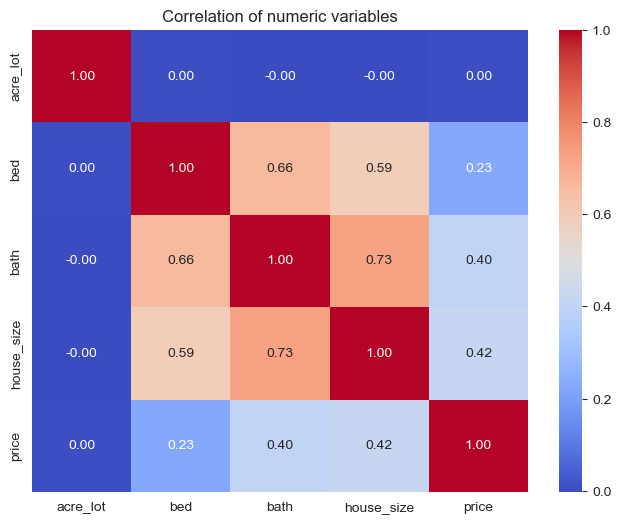

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric_corr, annot=True, cmap='coolwarm', fmt = '.2f')
plt.title('Correlation of numeric variables')
plt.show()

In [ ]:
df.to_csv('sample_data.csv', index= False)